### 多因子選股回測

#### Step1. 讀取股池內的股票

In [1]:
import pandas as pd
import quantstats as qs
import numpy as np

In [2]:
df1 = pd.read_pickle('Stock_Pool.pkl')   ## 以加權指數成分股為例
df1

Symbol,1101,1102,1103,1104,1108,1109,1110,1201,1203,1210,...,9939,9940,9941,9942,9943,9944,9945,9946,9955,9958
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-03,0.0225,0.0112,0.0024,0.0021,0.0013,0.0011,0.0018,0.0016,0.0008,0.0028,...,0.0009,0.0023,0.0016,0.0003,0.0004,0.0003,0.0100,0.001,0.0003,0.0007
2023-01-04,0.0225,0.0112,0.0024,0.0021,0.0013,0.0011,0.0018,0.0016,0.0008,0.0028,...,0.0009,0.0023,0.0016,0.0003,0.0004,0.0003,0.0100,0.001,0.0003,0.0007
2023-01-05,0.0225,0.0112,0.0024,0.0021,0.0013,0.0011,0.0018,0.0016,0.0008,0.0028,...,0.0009,0.0023,0.0016,0.0003,0.0004,0.0003,0.0100,0.001,0.0003,0.0007
2023-01-06,0.0225,0.0112,0.0024,0.0021,0.0013,0.0011,0.0018,0.0016,0.0008,0.0028,...,0.0009,0.0023,0.0016,0.0003,0.0004,0.0003,0.0100,0.001,0.0003,0.0007
2023-01-09,0.0225,0.0112,0.0024,0.0021,0.0013,0.0011,0.0018,0.0016,0.0008,0.0028,...,0.0009,0.0023,0.0016,0.0003,0.0004,0.0003,0.0100,0.001,0.0003,0.0007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-24,0.0233,0.0110,0.0024,0.0021,0.0013,0.0011,0.0018,0.0016,0.0007,0.0028,...,0.0009,0.0023,0.0017,0.0003,0.0004,0.0003,0.0088,0.001,0.0003,0.0008
2024-06-25,0.0233,0.0110,0.0024,0.0021,0.0013,0.0011,0.0018,0.0016,0.0007,0.0028,...,0.0009,0.0023,0.0017,0.0003,0.0004,0.0003,0.0088,0.001,0.0003,0.0008
2024-06-26,0.0233,0.0110,0.0024,0.0021,0.0013,0.0011,0.0018,0.0016,0.0007,0.0028,...,0.0009,0.0023,0.0017,0.0003,0.0004,0.0003,0.0088,0.001,0.0003,0.0008


##### Step1.1 將股池內的成分股轉換為True或False

In [3]:
pool = df1.notna()
pool

Symbol,1101,1102,1103,1104,1108,1109,1110,1201,1203,1210,...,9939,9940,9941,9942,9943,9944,9945,9946,9955,9958
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-03,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2023-01-04,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2023-01-05,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2023-01-06,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2023-01-09,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-24,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2024-06-25,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2024-06-26,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


#### Step2.讀取因子資料(以股利殖利率、月成交量、市值為例)，並根據該股是否存在股池，進行篩選

In [4]:
df2 = pd.read_pickle('Dividend_Rate.pkl')
df3 = pd.read_pickle('Market_Value.pkl')

In [5]:
Dividend_Rate = df2[pool].dropna(axis=1,how = 'all')
Dividend_Rate

Index,1101,1102,1103,1104,1108,1109,1110,1201,1203,1210,...,9939,9940,9941,9942,9943,9944,9945,9946,9955,9958
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-03,2.5532,8.3735,3.7464,4.5045,5.5814,9.6605,1.0840,2.6368,3.1700,3.1432,...,4.9768,10.4089,2.7103,4.7619,0.9549,4.9261,3.0616,5.5967,0.0,3.2883
2023-01-04,2.5532,8.3427,3.7143,4.4843,5.5556,9.6296,1.0840,2.6508,3.1700,3.1501,...,4.9942,10.2752,2.6425,4.7619,0.9549,4.9140,3.0757,5.5510,0.0,3.2596
2023-01-05,2.4828,8.2717,3.7037,4.4743,5.4545,9.5989,1.0870,2.6368,3.1519,3.1606,...,4.9482,10.2752,2.6343,4.7847,0.9534,4.8900,3.1008,5.5738,0.0,3.3397
2023-01-06,2.4973,8.2217,3.6932,4.4743,5.5046,9.5685,1.0959,2.6368,3.1792,3.1571,...,4.9199,10.2752,2.6508,4.7619,0.9457,4.8900,3.0936,5.5510,0.0,3.3286
2023-01-09,2.4720,8.1332,3.6620,4.4643,5.5046,9.5081,1.0929,2.6230,3.0986,3.1192,...,4.9031,10.2004,2.6261,4.8780,0.9534,4.8900,3.0476,5.5285,0.0,3.2037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-24,2.9197,4.6823,2.7198,5.1724,5.9172,6.1538,0.9281,1.4111,2.1154,3.9264,...,3.2424,5.0000,3.9739,5.4902,5.7714,2.6490,3.3482,1.6807,0.0,0.8851
2024-06-25,2.8986,4.8165,2.7100,5.1502,5.9347,6.1069,0.9281,1.4074,2.0873,3.8989,...,3.2132,4.9844,4.0940,5.4687,5.7778,2.6966,3.3670,1.6929,0.0,0.8946
2024-06-26,2.9070,4.8276,2.7248,5.1209,5.9524,6.1381,0.9324,1.4187,2.0992,3.9195,...,3.1940,5.0236,4.1077,5.4902,5.8166,2.6786,3.4091,1.6929,0.0,0.8837


In [6]:
Market_Value =df3[pool].dropna(axis = 1 , how ='all')
Market_Value

Index,1101,1102,1103,1104,1108,1109,1110,1201,1203,1210,...,9939,9940,9941,9942,9943,9944,9945,9946,9955,9958
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-03,239732.0,143965.0,13442.0,14510.0,4351.0,5322.0,10553.0,9615.0,8328.0,40667.0,...,24865.0,19821.0,77549.0,8732.0,7714.0,2215.0,137629.0,3968.0,2105.0,21125.0
2023-01-04,239732.0,144497.0,13559.0,14575.0,4371.0,5339.0,10553.0,9565.0,8328.0,40578.0,...,24778.0,20079.0,79538.0,8732.0,7714.0,2220.0,136997.0,4000.0,2167.0,21311.0
2023-01-05,246530.0,145738.0,13597.0,14608.0,4452.0,5356.0,10525.0,9615.0,8376.0,40443.0,...,25009.0,20079.0,79786.0,8690.0,7726.0,2231.0,135891.0,3984.0,2384.0,20799.0
2023-01-06,245099.0,146624.0,13636.0,14608.0,4412.0,5373.0,10439.0,9615.0,8304.0,40488.0,...,25152.0,20079.0,79289.0,8732.0,7789.0,2231.0,136207.0,4000.0,2338.0,20869.0
2023-01-09,247604.0,148220.0,13752.0,14641.0,4412.0,5407.0,10468.0,9666.0,8520.0,40980.0,...,25239.0,20226.0,80035.0,8524.0,7726.0,2231.0,138261.0,4017.0,2363.0,21683.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-24,258628.0,159063.0,14501.0,23428.0,6840.0,6653.0,12327.0,9539.0,12480.0,50644.0,...,47485.0,23579.0,84153.0,10603.0,11282.0,2471.0,127421.0,13601.0,3478.0,84519.0
2024-06-25,260516.0,154630.0,14580.0,23529.0,6820.0,6704.0,12327.0,9565.0,12648.0,51002.0,...,47916.0,23653.0,81686.0,10645.0,11270.0,2428.0,126710.0,13503.0,3427.0,83620.0
2024-06-26,259761.0,154275.0,14501.0,23664.0,6800.0,6670.0,12269.0,9489.0,12576.0,50733.0,...,48204.0,23469.0,81411.0,10603.0,11195.0,2444.0,125146.0,13503.0,3380.0,84647.0


#### Step3. 讀取所有股票的日報酬率，並根據該股是否存在股池進行篩選

In [7]:
df5 = pd.read_pickle('Daily_Return.pkl')
df5

Index,1101,1102,1103,1104,1108,1109,1110,1201,1203,1210,...,9939,9940,9941,9942,9943,9944,9945,9946,9955,9958
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-03,-0.4458,-0.9756,-0.2874,0.0000,0.0000,-0.3195,-1.3369,-0.2625,-0.5731,-0.2195,...,-0.6897,0.0000,0.3215,-0.4739,-0.9646,-0.7335,0.6936,-0.4098,3.0303,2.5959
2023-01-04,0.0000,0.3695,0.8646,0.4505,0.4651,0.3205,0.0000,-0.5263,0.0000,-0.2200,...,-0.3472,1.3011,2.5641,0.0000,0.0000,0.2463,-0.4592,0.8230,2.9412,0.8801
2023-01-05,2.8358,0.8589,0.2857,0.2242,1.8519,0.3195,-0.2710,0.5291,0.5764,-0.3308,...,0.9292,0.0000,0.3125,-0.4762,0.1623,0.4914,-0.8074,-0.4082,10.0000,-2.3991
2023-01-06,-0.5806,0.6083,0.2849,0.0000,-0.9091,0.3185,-0.8152,0.0000,-0.8596,0.1106,...,0.5754,0.0000,-0.6231,0.4785,0.8104,0.0000,0.2326,0.4098,-1.9481,0.3352
2023-01-09,1.0219,1.0883,0.8523,0.2237,0.0000,0.6349,0.2740,0.5263,2.6012,1.2155,...,0.3432,0.7339,0.9404,-2.3810,-0.8039,0.0000,1.5081,0.4082,1.1038,3.8976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-24,-1.1544,0.6734,-0.2717,0.1439,0.0000,-0.2558,3.3573,-0.2646,0.0000,-0.1764,...,-2.9412,-1.2346,-3.1546,-0.7782,-0.1109,0.4435,-0.3337,-2.5731,1.2012,-3.8012
2024-06-25,0.7299,-2.7871,0.5450,0.4310,-0.2959,0.7692,0.0000,0.2653,1.3462,0.7067,...,0.9091,0.3125,-2.9316,0.3922,-0.1110,0.8830,-0.5580,-0.7203,-1.4837,-1.0638
2024-06-26,-0.2899,-0.2294,-0.5420,0.5722,-0.2967,-0.5089,-0.4640,-0.7937,-0.5693,-0.5263,...,0.6006,-0.7788,-0.3356,-0.3906,-0.6667,0.6742,-1.2346,0.0000,-1.3554,1.2289


In [8]:
Daily_Return =df5[pool].dropna(axis = 1 , how ='all')
Daily_Return

Index,1101,1102,1103,1104,1108,1109,1110,1201,1203,1210,...,9939,9940,9941,9942,9943,9944,9945,9946,9955,9958
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-03,-0.4458,-0.9756,-0.2874,0.0000,0.0000,-0.3195,-1.3369,-0.2625,-0.5731,-0.2195,...,-0.6897,0.0000,0.3215,-0.4739,-0.9646,-0.7335,0.6936,-0.4098,3.0303,2.5959
2023-01-04,0.0000,0.3695,0.8646,0.4505,0.4651,0.3205,0.0000,-0.5263,0.0000,-0.2200,...,-0.3472,1.3011,2.5641,0.0000,0.0000,0.2463,-0.4592,0.8230,2.9412,0.8801
2023-01-05,2.8358,0.8589,0.2857,0.2242,1.8519,0.3195,-0.2710,0.5291,0.5764,-0.3308,...,0.9292,0.0000,0.3125,-0.4762,0.1623,0.4914,-0.8074,-0.4082,10.0000,-2.3991
2023-01-06,-0.5806,0.6083,0.2849,0.0000,-0.9091,0.3185,-0.8152,0.0000,-0.8596,0.1106,...,0.5754,0.0000,-0.6231,0.4785,0.8104,0.0000,0.2326,0.4098,-1.9481,0.3352
2023-01-09,1.0219,1.0883,0.8523,0.2237,0.0000,0.6349,0.2740,0.5263,2.6012,1.2155,...,0.3432,0.7339,0.9404,-2.3810,-0.8039,0.0000,1.5081,0.4082,1.1038,3.8976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-24,-1.1544,0.6734,-0.2717,0.1439,0.0000,-0.2558,3.3573,-0.2646,0.0000,-0.1764,...,-2.9412,-1.2346,-3.1546,-0.7782,-0.1109,0.4435,-0.3337,-2.5731,1.2012,-3.8012
2024-06-25,0.7299,-2.7871,0.5450,0.4310,-0.2959,0.7692,0.0000,0.2653,1.3462,0.7067,...,0.9091,0.3125,-2.9316,0.3922,-0.1110,0.8830,-0.5580,-0.7203,-1.4837,-1.0638
2024-06-26,-0.2899,-0.2294,-0.5420,0.5722,-0.2967,-0.5089,-0.4640,-0.7937,-0.5693,-0.5263,...,0.6006,-0.7788,-0.3356,-0.3906,-0.6667,0.6742,-1.2346,0.0000,-1.3554,1.2289


#### Step4. 將因子進行整理，並且根據經濟意義設定買進、賣出條件

In [9]:
MV_rank = Market_Value.rank(axis=1, pct=True, ascending=True)
Dividend_Rate_rank = Dividend_Rate.rank(axis=1, pct=True, ascending=True)

long_signal = (MV_rank < 0.3) & (Dividend_Rate_rank < 0.5 )    #假設市值低、股利少的股票有潛力
short_signal = (MV_rank > 0.7) & (Dividend_Rate_rank > 0.6 )   #假設市值高、股利多的股票難發展

#### Step5. 將確定買入、賣出的時間點統合，並且更改權重

In [10]:
weighting = long_signal.astype(int) + (short_signal.astype(int)* -1)
weighting = weighting.div(weighting.abs().sum(axis=1), axis=0)
weighting

Index,1101,1102,1103,1104,1108,1109,1110,1201,1203,1210,...,9939,9940,9941,9942,9943,9944,9945,9946,9955,9958
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-03,0.000000,-0.003356,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,-0.003356,-0.003356,0.000000,0.0,0.0,0.0,0.000000,0.0,0.003356,0.0
2023-01-04,0.000000,-0.003378,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,-0.003378,-0.003378,0.000000,0.0,0.0,0.0,0.000000,0.0,0.003378,0.0
2023-01-05,0.000000,-0.003367,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,-0.003367,-0.003367,0.000000,0.0,0.0,0.0,0.000000,0.0,0.003367,0.0
2023-01-06,0.000000,-0.003390,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,-0.003390,-0.003390,0.000000,0.0,0.0,0.0,0.000000,0.0,0.003390,0.0
2023-01-09,0.000000,-0.003390,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,-0.003390,-0.003390,0.000000,0.0,0.0,0.0,0.000000,0.0,0.003390,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-24,-0.003058,-0.003058,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,-0.003058,...,-0.003058,0.000000,-0.003058,0.0,0.0,0.0,-0.003058,0.0,0.003058,0.0
2024-06-25,-0.003040,-0.003040,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,-0.003040,...,-0.003040,-0.003040,-0.003040,0.0,0.0,0.0,-0.003040,0.0,0.003040,0.0
2024-06-26,-0.003058,-0.003058,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,-0.003058,...,-0.003058,0.000000,-0.003058,0.0,0.0,0.0,-0.003058,0.0,0.003058,0.0


In [11]:
ret_df = weighting * Daily_Return * 0.01
ret_df = ret_df.dropna(axis=0,how='all')

In [12]:
ret_df

Index,1101,1102,1103,1104,1108,1109,1110,1201,1203,1210,...,9939,9940,9941,9942,9943,9944,9945,9946,9955,9958
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-03,-0.000000,0.000033,-0.0,0.000000,0.0,-0.0,-0.0,-0.0,-0.0,-0.000000,...,0.000023,-0.000000,0.000000,-0.0,-0.0,-0.0,0.000000,-0.0,0.000102,0.0
2023-01-04,0.000000,-0.000012,0.0,0.000000,0.0,0.0,0.0,-0.0,0.0,-0.000000,...,0.000012,-0.000044,0.000000,0.0,0.0,0.0,-0.000000,0.0,0.000099,0.0
2023-01-05,0.000000,-0.000029,0.0,0.000000,0.0,0.0,-0.0,0.0,0.0,-0.000000,...,-0.000031,-0.000000,0.000000,-0.0,0.0,0.0,-0.000000,-0.0,0.000337,-0.0
2023-01-06,-0.000000,-0.000021,0.0,0.000000,-0.0,0.0,-0.0,0.0,-0.0,0.000000,...,-0.000020,-0.000000,-0.000000,0.0,0.0,0.0,0.000000,0.0,-0.000066,0.0
2023-01-09,0.000000,-0.000037,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,-0.000012,-0.000025,0.000000,-0.0,-0.0,0.0,0.000000,0.0,0.000037,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-24,0.000035,-0.000021,-0.0,0.000000,0.0,-0.0,0.0,-0.0,0.0,0.000005,...,0.000090,-0.000000,0.000096,-0.0,-0.0,0.0,0.000010,-0.0,0.000037,-0.0
2024-06-25,-0.000022,0.000085,0.0,0.000000,-0.0,0.0,0.0,0.0,0.0,-0.000021,...,-0.000028,-0.000009,0.000089,0.0,-0.0,0.0,0.000017,-0.0,-0.000045,-0.0
2024-06-26,0.000009,0.000007,-0.0,0.000000,-0.0,-0.0,-0.0,-0.0,-0.0,0.000016,...,-0.000018,-0.000000,0.000010,-0.0,-0.0,0.0,0.000038,0.0,-0.000041,0.0


In [13]:
ret_df.sum(axis=1).cumsum().plot()

<Axes: xlabel='Date'>

c:\Users\User\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\User\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\User\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **pass

                           Strategy
-------------------------  ----------
Start Period               2023-01-03
End Period                 2024-06-28
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          3.19%
CAGR﹪                     1.47%

Sharpe                     0.11
Prob. Sharpe Ratio         72.47%
Smart Sharpe               0.1
Sortino                    0.15
Smart Sortino              0.14
Sortino/√2                 0.11
Smart Sortino/√2           0.1
Omega                      1.09

Max Drawdown               -6.23%
Longest DD Days            369
Volatility (ann.)          1.0%
Calmar                     0.24
Skew                       -0.43
Kurtosis                   0.88

Expected Daily %           0.01%
Expected Monthly %         0.17%
Expected Yearly %          1.58%
Kelly Criterion            4.16%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.47%
Expected Shortfall (cVaR)  -0.47%

Max Consecutive Wins       6
Max

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2023-06-26,2024-03-21,2024-06-28,369,-6.233386,-5.758819
2,2023-05-05,2023-05-11,2023-06-20,47,-1.638202,-1.569015
3,2023-03-09,2023-03-16,2023-04-12,35,-1.571597,-1.280096
4,2023-01-05,2023-01-30,2023-02-06,33,-1.144234,-1.138950
5,2023-04-20,2023-04-21,2023-05-03,14,-1.044474,-0.925728


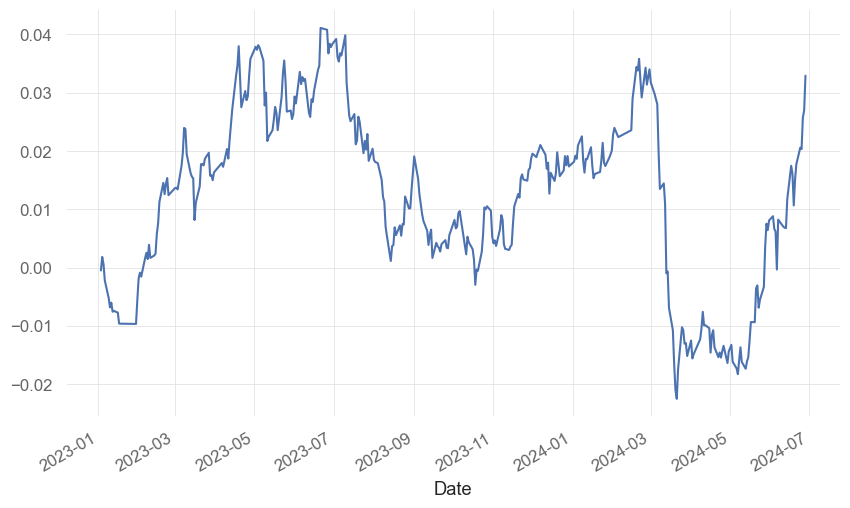

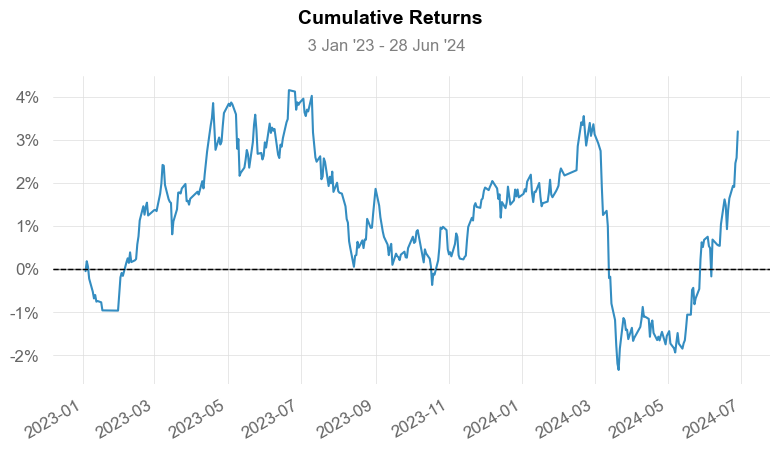

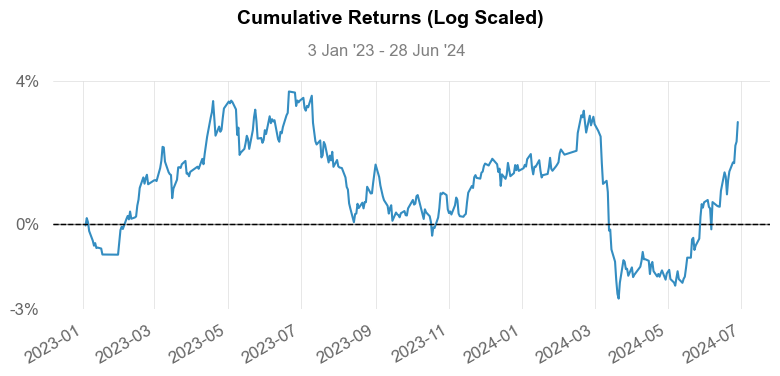

c:\Users\User\anaconda3\Lib\site-packages\quantstats\_plotting\wrappers.py:565: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  returns = returns.resample("A").apply(_stats.comp)
c:\Users\User\anaconda3\Lib\site-packages\quantstats\_plotting\wrappers.py:568: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  returns = returns.resample("A").last()


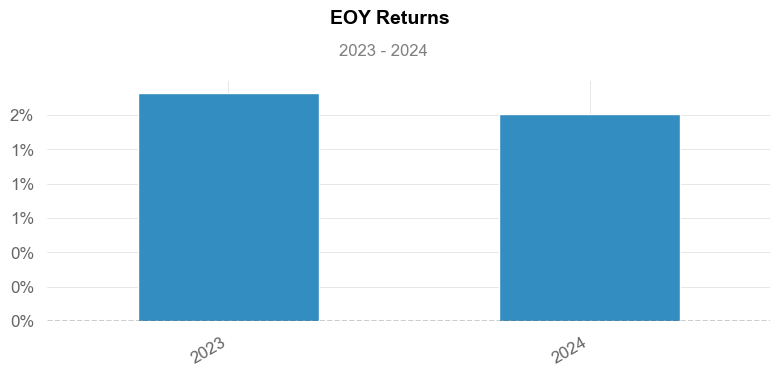

c:\Users\User\anaconda3\Lib\site-packages\quantstats\_plotting\core.py:440: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  returns.fillna(0).resample(resample).apply(apply_fnc).resample(resample).last()


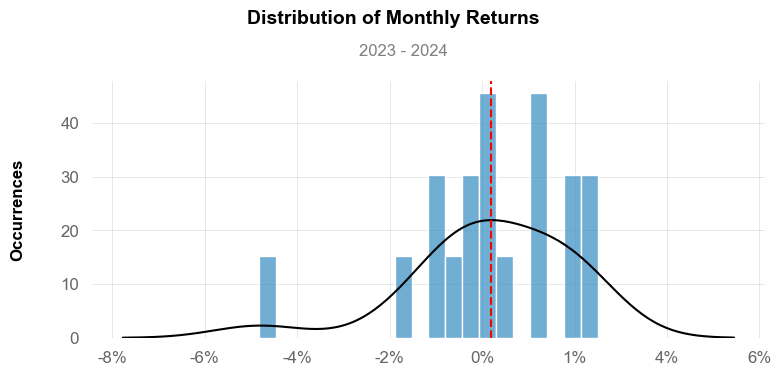

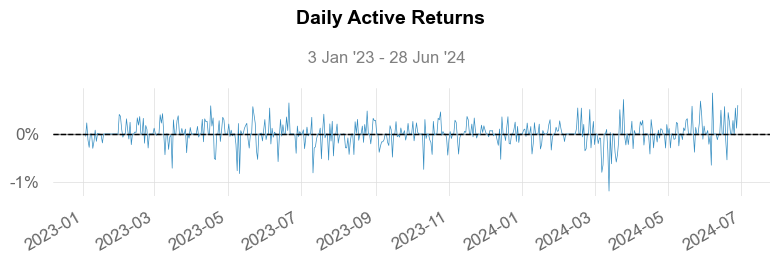

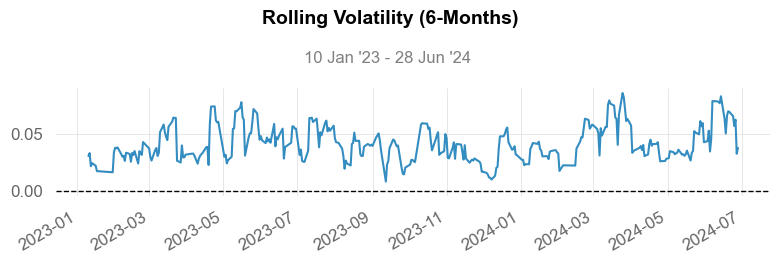

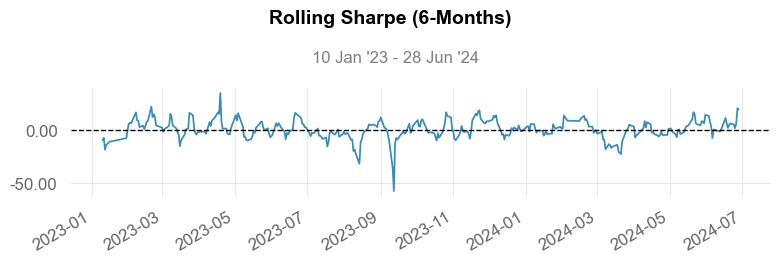

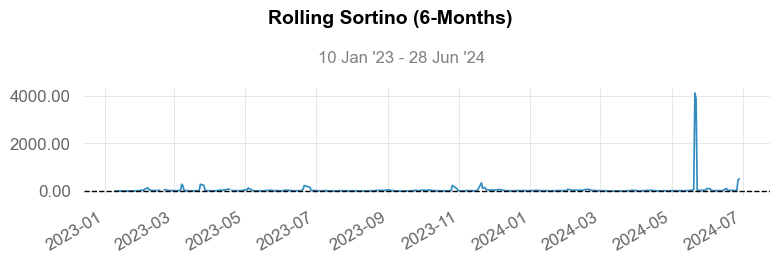

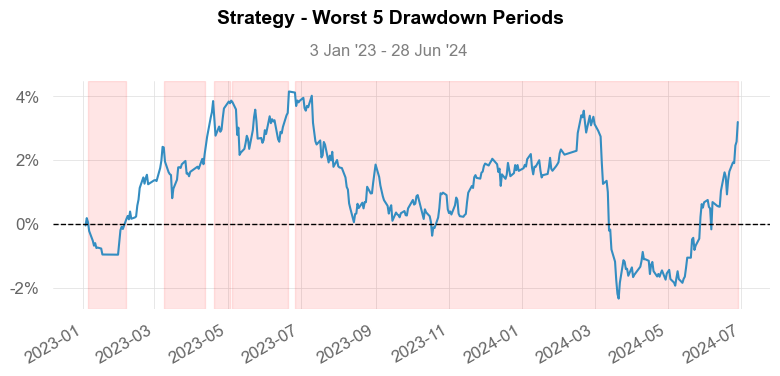

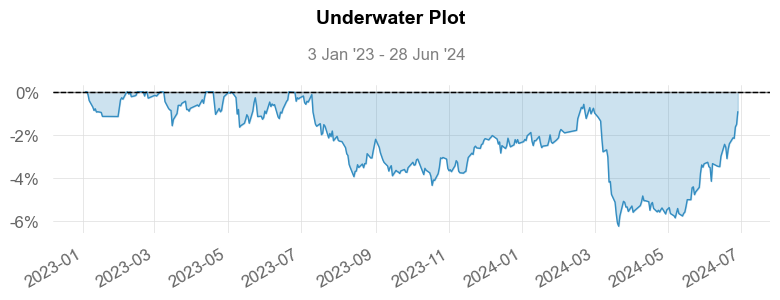

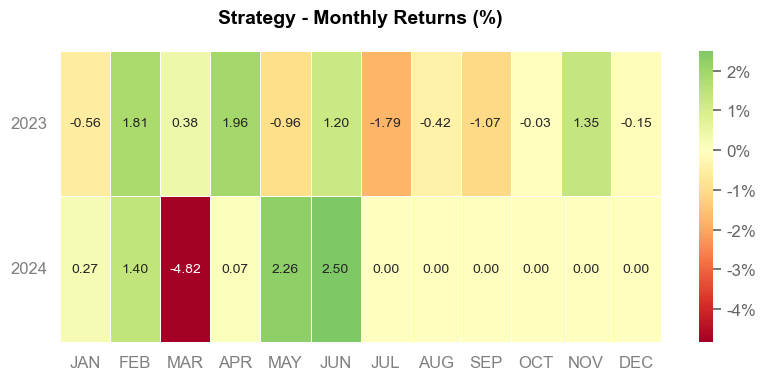

c:\Users\User\anaconda3\Lib\site-packages\quantstats\_plotting\core.py:1016: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  port["Weekly"].ffill(inplace=True)
c:\Users\User\anaconda3\Lib\site-packages\quantstats\_plotting\core.py:1018: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  port["Monthly"] = port["Daily"].resample("M").apply(apply_fnc)
c:\Users\User\anaconda3\Lib\site-packages\quantstats\_plotting\core.py:1019: FutureWarning: A value is trying to be set on a copy of 

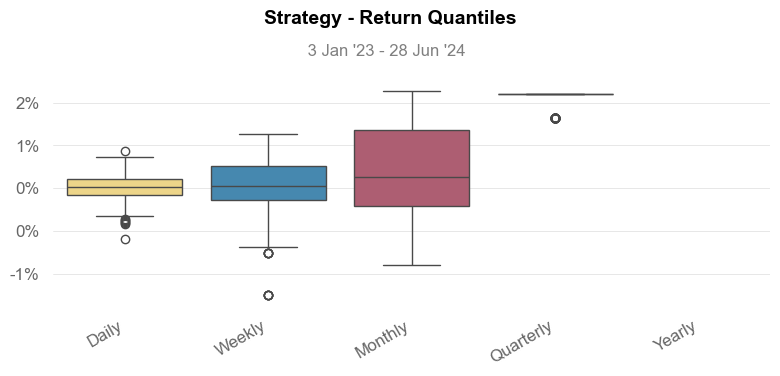

In [14]:
qs.reports.full(ret_df.sum(axis=1),periods_per_year=12)